<a href="https://colab.research.google.com/github/Thejasmayur31/TASK-4_ELEVATELAB_INTERN/blob/main/TASK_4_ELEVATELAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

27/06/2025

# **Task 4: Classification with Logistic Regression.**
 Objective: Build a binary classifier using logistic regression.
Tools:  Scikit-learn, Pandas, Matplotlib

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df=pd.read_csv('/content/BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


In [6]:
x= df.drop('class',axis=1)
y=df['class']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(x_test)
y_prob=model.predict_proba(x_test)

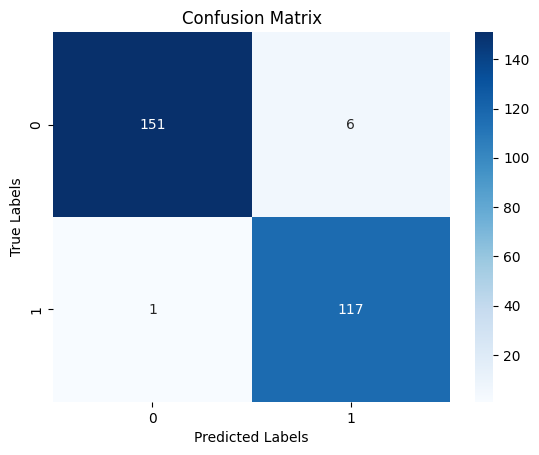

In [13]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
print("classification report: \n")
print(classification_report(y_test,y_pred))

classification report: 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       157
           1       0.95      0.99      0.97       118

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



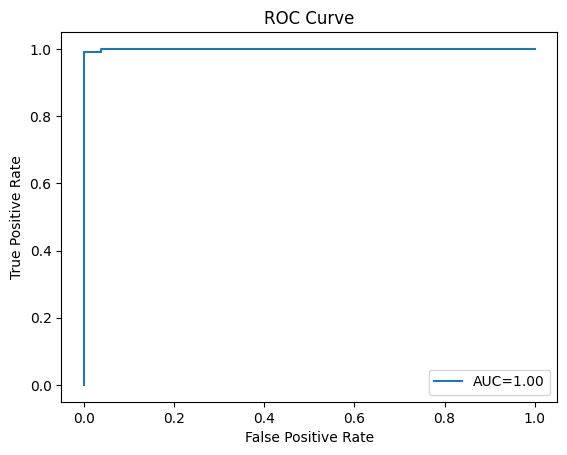

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

fpr,tpr,threshold = roc_curve(y_test,y_prob[:,1])
auc=roc_auc_score(y_test,y_prob[:,1])

plt.plot(fpr,tpr,label='AUC={:.2f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [19]:
threshold = 0.6
y_pred_threshold = (y_prob[:, 1] >= threshold).astype(int)

Text(50.722222222222214, 0.5, 'True Labels')

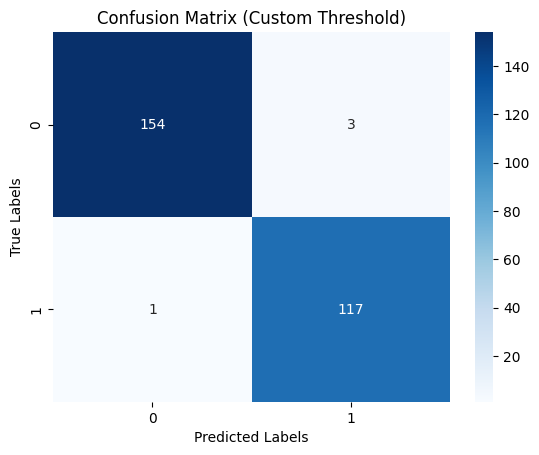

In [20]:
cm_custom = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Custom Threshold)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

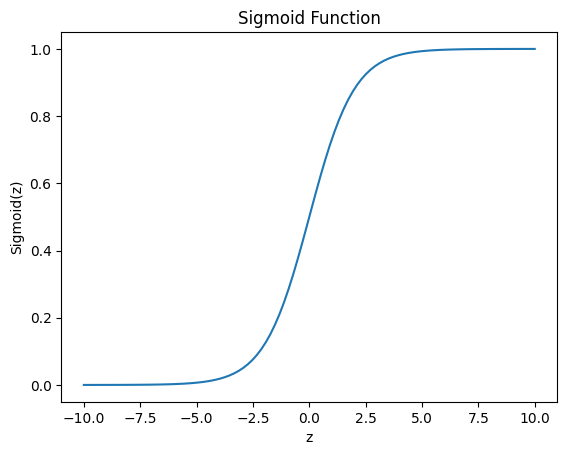

In [23]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.show()